In [ ]:
# Install required libraries
!pip install gensim numpy matplotlib scikit-learn

# Import libraries
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load pre-trained word vectors
print("Loading pre-trained word vectors...")
word_vectors = api.load("glove-wiki-gigaword-50")  # Load Word2Vec model

# Function to perform vector arithmetic and find similar words
def explore_word_relationships(word1, word2, word3):
    try:
        # Perform vector arithmetic: word1 - word2 + word3
        result_vector = word_vectors[word1] - word_vectors[word2] + word_vectors[word3]

        # Find the most similar words to the resulting vector
        similar_words = word_vectors.similar_by_vector(result_vector, topn=10)

        # Exclude input words from the results
        input_words = {word1, word2, word3}
        filtered_words = [(word, similarity) for word, similarity in similar_words if word not in input_words]

        print(f"\nWord Relationship: {word1} - {word2} + {word3}")
        print("Most similar words to the result (excluding input words):")
        for word, similarity in filtered_words[:5]:  # Show top 5 results
            print(f"{word}: {similarity:.4f}")

        return filtered_words

    except KeyError as e:
        print(f"Error: {e} not found in the vocabulary.")
        return []
        
# Function to visualize word embeddings using PCA or t-SNE
def visualize_word_embeddings(words, vectors, method='pca'):
    # Reduce dimensionality to 2D
    if method == 'pca':
        reducer = PCA(n_components=2)
    elif method == 'tsne':
        reducer = TSNE(n_components=2, random_state=42, perplexity=3)  # Adjust perplexity as needed
    else:
        raise ValueError("Method must be 'pca' or 'tsne'.")

    # Fit and transform the vectors
    reduced_vectors = reducer.fit_transform(vectors)

    # Plot the results
    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], marker='o', color='blue')
        plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02, word, fontsize=12)

    plt.title(f"Word Embeddings Visualization using {method.upper()}")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.show()
    
# Example word relationships to explore
words_to_explore = ["king", "man", "woman", "queen", "prince", "princess", "royal", "throne"]# Visualize using PCA
filtered_words = explore_word_relationships("king", "man", "woman")

# Add the filtered words to the list of words to visualize
words_to_visualize = words_to_explore + [word for word, _ in filtered_words]

# Get vectors for the words to visualize
vectors_to_visualize = np.array([word_vectors[word] for word in words_to_visualize])

Loading pre-trained word vectors...


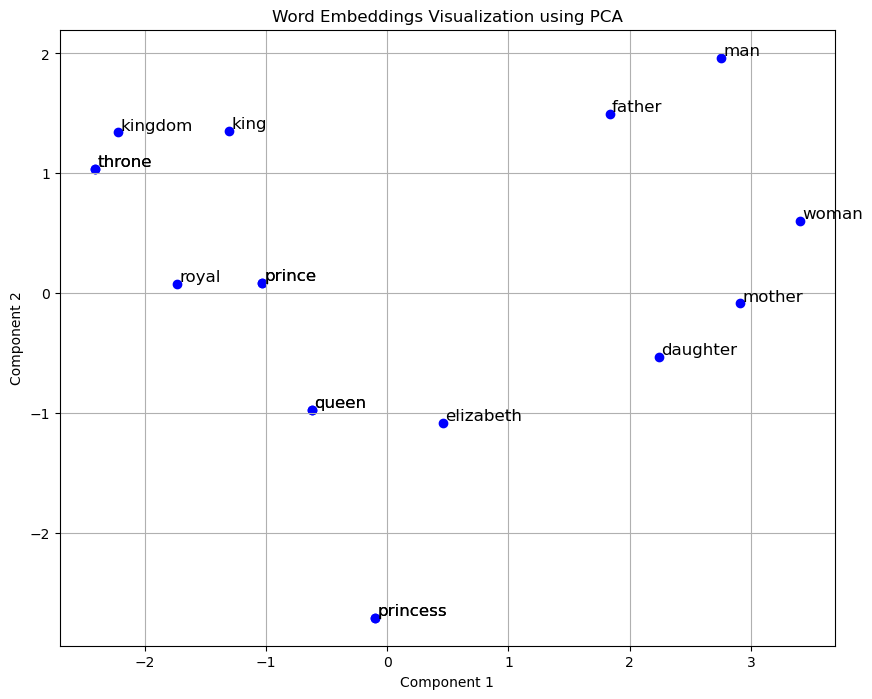

In [3]:
# Visualize using PCA
visualize_word_embeddings(words_to_visualize, vectors_to_visualize, method='pca')

C:\Users\Shrey\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Shrey\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Shrey\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Shrey\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Shrey\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

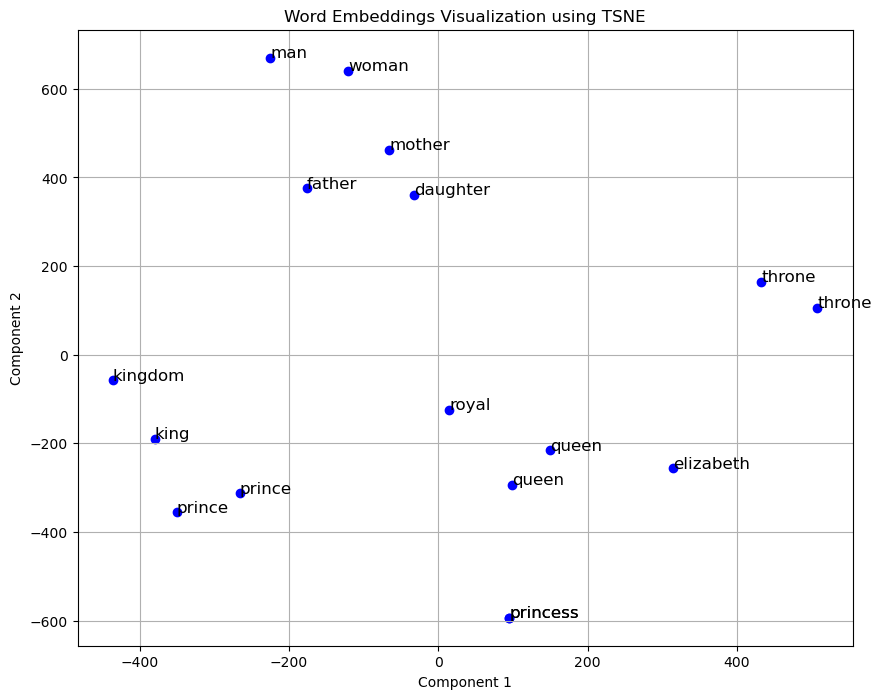

In [4]:
# Visualize using t-SNE
visualize_word_embeddings(words_to_visualize, vectors_to_visualize, method='tsne')